## Import Modules and Agent Types

In [1]:
# %conda install matplotlib
# %conda install scipy
# %conda install pandas
# %conda instal ffmpeg
# %conda install seaborn
# %conda install scikit-learn
# %conda install conda-forge::moviepy

In [2]:
import random as rnd
import operator
import os
import time
import copy
import sys

# Data processing
import numpy as np                              # import numpy
import pandas as pd
import json

# Plotting
import matplotlib.pyplot as plt                 # import matplotlib
import seaborn as sns
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.ticker as tckr

# Custom packages for simulation
# This works only if notebooks folder is in the "modules" parent folder
sys.path.insert(0, '..') # add modules folder (parent folder) into this notebook's path
import institutions.dm_bargain as dm_bargain
import institutions.dm_travel as dm_travel
import environment.dm_agents as dm_agents
import environment.dm_env as env
import dm_utils as dm
import simulations.dm_sim_period as simulate
import dm_process_results as results
import environment.env_make_agents as make_env
#TODO: Change imported name, propagate


# Using some old functionality of pandas so need this for now - TODO replace the funcitonality
import warnings
warnings.filterwarnings("ignore")

## Build environment

In [3]:
# Agent Types
ZID = dm_agents.ZID     # name of agent class
ZIDA = dm_agents.ZIDA   # name of agent class
ZIDP = dm_agents.ZIDP   # name of class that accepts best offer
trader_objects = [(ZID, 4), (ZID, 4)]     
grid_size = 1     # Grid is grid_size x grid_size
num_traders = 8   # traders (multiple of two) 
num_units = 6     # Number of units per trader
lower_bound = 200 # lower bound on values or costs
upper_bound = 600 # upper bound on values or costs
debug = False
market_type = "ONE_TYPE"
item_types = ['C']
default_rep = 100

agent_maker = make_env.MakeAgents(num_traders, trader_objects, num_units, 
                                grid_size, lower_bound, upper_bound, debug, market_type, item_types, default_rep)
#agent_maker.make_test_agents()
agent_maker.make_agents()
agent_maker.make_locations()
agents = agent_maker.get_agents()
agent_maker.print_agents(agents)


B_1_ZID    BUYER  @(0, 0):[  584,  578,  514,  436,  328,  317]cu = 0
B_2_ZID    BUYER  @(0, 0):[  556,  534,  462,  438,  346,  308]cu = 0
B_3_ZID    BUYER  @(0, 0):[  556,  537,  495,  471,  410,  364]cu = 0
B_4_ZID    BUYER  @(0, 0):[  574,  567,  513,  500,  434,  328]cu = 0
S_5_ZID    SELLER @(0, 0):[  285,  426,  439,  449,  458,  469]cu = 0
S_6_ZID    SELLER @(0, 0):[  213,  272,  327,  424,  453,  454]cu = 0
S_7_ZID    SELLER @(0, 0):[  223,  224,  225,  320,  361,  375]cu = 0
S_8_ZID    SELLER @(0, 0):[  210,  255,  381,  450,  457,  462]cu = 0


## Present Environment as Supply and Demand

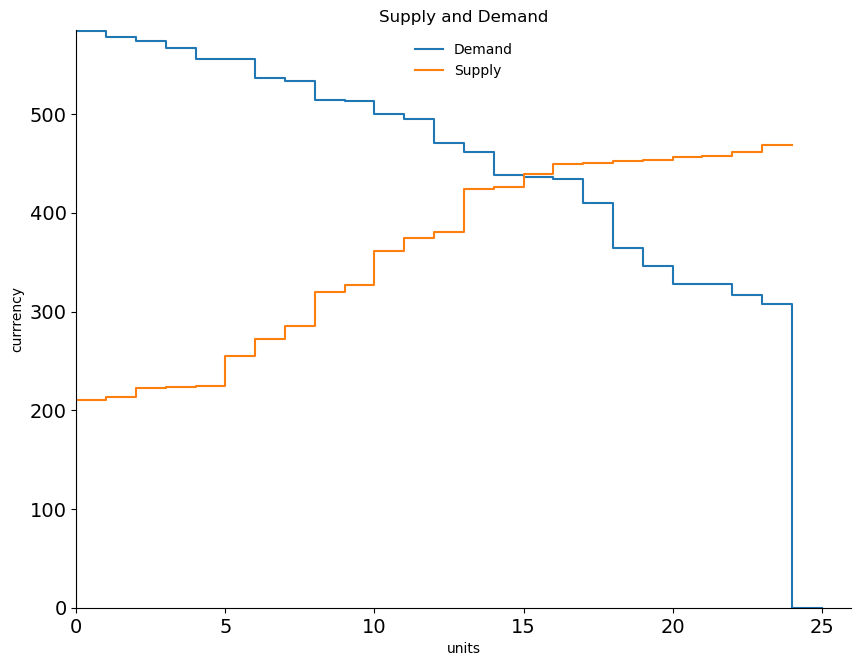

In [4]:
# set up market
agent_maker.make_market("test_market")
agent_maker.plot_market()
market = agent_maker.get_market()

## Show Equilibrium Calculations

In [5]:
agent_maker.show_equilibrium()


When market test_market is in equilibrium we have:
equilibrium price    = 426 - 438
equilibrium quantity = 15
maximum surplus      = 3358



## Sample Simulation

In [6]:
"""def print_contracts(contracts):
    print("CONTRACTS:")
    print("rnd, b_cu:b_val -price- s_cos:s_cu  buyer_id, seller_id")
    print("-------------------------------------------------------")
    for contract in contracts:
        round = contract[0]
        price = contract[1]
        buyer = contract[2]
        seller = contract[3]
        b_cur = contract[4]
        b_val = contract[5]
        s_cur = contract[6]
        s_cos = contract[7]
        print(f"{round:2} {b_cur:3}:{b_val:<4}-{price:4} -{s_cos:>4}:{s_cur:<3}    {buyer:10} {seller:10}")"""

# Test ZID

# Agent Types
ZID = dm_agents.ZID     # name of agent class
ZIDA = dm_agents.ZIDA   # name of agent class
ZIDP = dm_agents.ZIDP   # name of class that accepts best offer
trader_types = [(ZID, 4), (ZID, 4)]     

# Classic Types
agent_maker = make_env.MakeAgents(num_traders, trader_types, num_units, 
                                grid_size, lower_bound, upper_bound, debug, market_type="ONE_TYPE", item_types=["C"], default_rep=100)
#agent_maker.make_test_agents()
agent_maker.make_agents()
agent_maker.make_locations()
agents = agent_maker.get_agents()
agent_maker.make_market("test_market")
market = agent_maker.get_market()
#agent_maker.print_agents(agents)

sim_name = "Sample One Period Simulation"
num_rounds = 10
num_periods = 1
plot_on = False
debug = False
m_type = "ONE_TYPE"
i_types = ['C']
b_type = "ABSTRACT"

big_contracts = pd.DataFrame()
sim_agents = copy.deepcopy(agents)
sim1 = simulate.SimPeriod(sim_name, num_rounds, sim_agents, 
                market, grid_size, debug, plot_on, market_type=m_type, item_types=i_types, bidding_type=b_type)
for period in range(num_periods):
    sim1.run_period()
    big_contracts = pd.concat([big_contracts, sim1.get_contracts()])

print()
contracts = sim1.get_contracts(all=True)
contracts


,contract_id,bid_id,ask_id,buyer_id,seller_id,placed_location,accept_location,property_right,item_type,currency_type,price,agent_id,round,period,week,barg_location
0,0,7,None,B_3_ZID,S_5_ZID,"(0, 0)","(0, 0)",SPOT,C,M,435,S_5_ZID,0,0,0,"(0, 0)"
1,1,9,None,B_4_ZID,S_7_ZID,"(0, 0)","(0, 0)",SPOT,C,M,386,S_7_ZID,1,0,0,"(0, 0)"
2,2,10,None,B_3_ZID,S_8_ZID,"(0, 0)","(0, 0)",SPOT,C,M,324,S_8_ZID,2,0,0,"(0, 0)"
3,3,20,None,B_2_ZID,S_7_ZID,"(0, 0)","(0, 0)",SPOT,C,M,456,S_7_ZID,2,0,0,"(0, 0)"
4,4,None,17,B_1_ZID,S_5_ZID,"(0, 0)","(0, 0)",SPOT,C,M,428,B_1_ZID,2,0,0,"(0, 0)"
5,5,0,None,B_1_ZID,S_8_ZID,"(0, 0)","(0, 0)",SPOT,C,M,344,S_8_ZID,3,0,0,"(0, 0)"
6,6,11,None,B_2_ZID,S_6_ZID,"(0, 0)","(0, 0)",SPOT,C,M,417,S_6_ZID,3,0,0,"(0, 0)"
7,7,14,None,B_1_ZID,S_7_ZID,"(0, 0)","(0, 0)",SPOT,C,M,353,S_7_ZID,3,0,0,"(0, 0)"
8,8,None,8,B_3_ZID,S_5_ZID,"(0, 0)","(0, 0)",SPOT,C,M,359,B_3_ZID,4,0,0,"(0, 0)"
9,9,39,None,B_4_ZID,S_7_ZID,"(0, 0)","(0, 0)",SPOT,C,M,435,S_7_ZID,5,0,0,"(0, 0)"


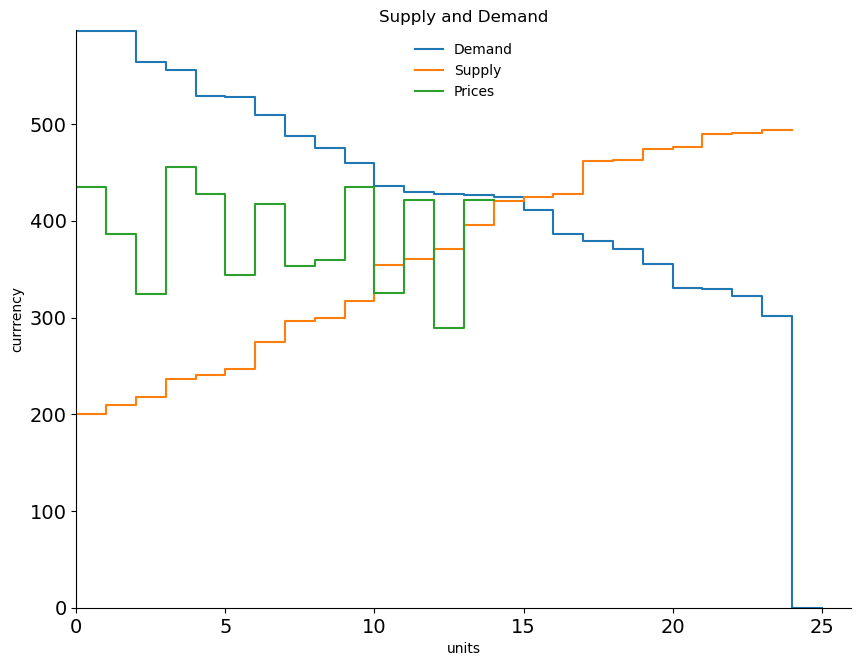

      equilibrium price range is 420 to 425
      average price = 385.2857142857143
      equilibrium expected contracts = 15, actual contracts = 14
      buyer surplus = 1577.0, seller surplus = 1291.0
      actual_surplus = 2868.0, maximum surplus = 3005
      efficiency = 95.44%.



In [7]:
pr_1 = results.ProcessResults(market, sim_name, agents, contracts, debug)
pr_1.plot_prices()

pr_1.get_results()
pr_1.display_results()

In [8]:
# Circular market type
m_type = "TWO_TYPE"
i_types = ["X","Y"]
b_type = "ABSTRACT"
d_rep = 100
agent_maker = make_env.MakeAgents(num_traders, trader_types, num_units, 
                                grid_size, lower_bound, upper_bound, debug, market_type=m_type, item_types=i_types, default_rep=d_rep)
#agent_maker.make_test_agents()
agent_maker.make_agents()
agent_maker.make_locations()
agents = agent_maker.get_agents()
agent_maker.make_market("test_market")
market = agent_maker.get_market()
#agent_maker.print_agents(agents)

sim_name = "Sample One Period Simulation"
num_rounds = 10
num_periods = 1
plot_on = False
debug = False


big_contracts = pd.DataFrame()
sim_agents = copy.deepcopy(agents)
sim1 = simulate.SimPeriod(sim_name, num_rounds, sim_agents, 
                market, grid_size, debug, plot_on, market_type=m_type, item_types=i_types, bidding_type=b_type)
for period in range(num_periods):
    sim1.run_period()
    big_contracts = pd.concat([big_contracts, sim1.get_contracts()])

print()
contracts = sim1.get_contracts(all=True)
contracts

,contract_id,bid_id,ask_id,buyer_id,seller_id,placed_location,accept_location,property_right,item_type,currency_type,price,agent_id,round,period,week,barg_location
0,0,None,3,T_7_ZID,T_3_ZID,"(0, 0)","(0, 0)",SPOT,Y,M,255,T_7_ZID,0,0,0,"(0, 0)"
1,1,None,4,T_4_ZID,T_8_ZID,"(0, 0)","(0, 0)",SPOT,X,M,490,T_4_ZID,0,0,0,"(0, 0)"
2,2,None,0,T_2_ZID,T_7_ZID,"(0, 0)","(0, 0)",SPOT,X,M,259,T_2_ZID,0,0,0,"(0, 0)"
3,3,1,None,T_7_ZID,T_1_ZID,"(0, 0)","(0, 0)",SPOT,Y,M,304,T_1_ZID,0,0,0,"(0, 0)"
4,4,16,None,T_2_ZID,T_6_ZID,"(0, 0)","(0, 0)",SPOT,X,M,509,T_6_ZID,1,0,0,"(0, 0)"
5,5,21,None,T_7_ZID,T_3_ZID,"(0, 0)","(0, 0)",SPOT,Y,M,374,T_3_ZID,1,0,0,"(0, 0)"
6,6,43,None,T_8_ZID,T_4_ZID,"(0, 0)","(0, 0)",SPOT,Y,M,355,T_4_ZID,2,0,0,"(0, 0)"
7,7,None,33,T_6_ZID,T_2_ZID,"(0, 0)","(0, 0)",SPOT,Y,M,279,T_6_ZID,2,0,0,"(0, 0)"
8,8,24,None,T_4_ZID,T_7_ZID,"(0, 0)","(0, 0)",SPOT,X,M,427,T_7_ZID,3,0,0,"(0, 0)"
9,9,None,20,T_1_ZID,T_7_ZID,"(0, 0)","(0, 0)",SPOT,X,M,459,T_1_ZID,4,0,0,"(0, 0)"


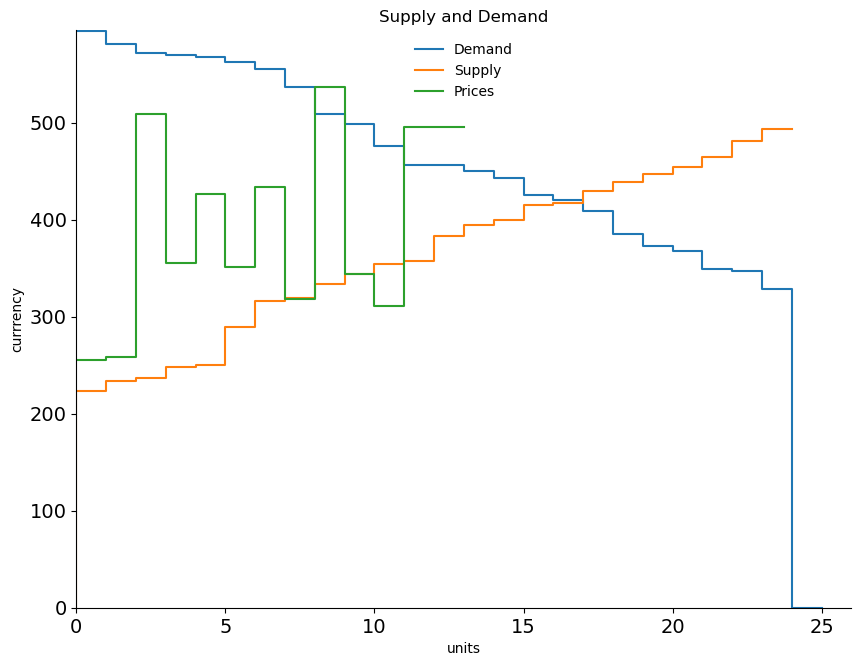

      equilibrium price range is 419.5 to 419.5
      average price = 391.6923076923077
      equilibrium expected contracts = 17.5, actual contracts = 13
      buyer surplus = 1341.0, seller surplus = 1231.5
      actual_surplus = 2572.5, maximum surplus = 3161.5
      efficiency = 81.16%.



In [9]:
pr_1 = results.ProcessResults(market, sim_name, agents, contracts, debug, market_type=m_type, item_types=i_types)
pr_1.plot_prices()

pr_1.get_results()
pr_1.display_results()

In [10]:
# Circular market type - zidp
trader_types = [(ZIDP, 4), (ZIDP, 4)]   
m_type = "TWO_TYPE"
i_types = ["X","Y"]
b_type = "ABSTRACT"
d_rep = 100
agent_maker = make_env.MakeAgents(num_traders, trader_types, num_units, 
                                grid_size, lower_bound, upper_bound, debug, market_type=m_type, item_types=i_types, default_rep=d_rep)
#agent_maker.make_test_agents()
agent_maker.make_agents()
agent_maker.make_locations()
agents = agent_maker.get_agents()
agent_maker.make_market("test_market")
market = agent_maker.get_market()
#agent_maker.print_agents(agents)

sim_name = "Sample One Period Simulation"
num_rounds = 10
num_periods = 1
plot_on = False
debug = False


big_contracts = pd.DataFrame()
sim_agents = copy.deepcopy(agents)
sim1 = simulate.SimPeriod(sim_name, num_rounds, sim_agents, 
                market, grid_size, debug, plot_on, market_type=m_type, item_types=i_types, bidding_type=b_type)
for period in range(num_periods):
    sim1.run_period()
    big_contracts = pd.concat([big_contracts, sim1.get_contracts()])

print()
contracts = sim1.get_contracts(all=True)
contracts

,contract_id,bid_id,ask_id,buyer_id,seller_id,placed_location,accept_location,property_right,item_type,currency_type,price,agent_id,round,period,week,barg_location
0,0,12,None,T_2_ZIDP,T_6_ZIDP,"(0, 0)","(0, 0)",SPOT,X,M,486,T_6_ZIDP,0,0,0,"(0, 0)"
1,1,None,7,T_6_ZIDP,T_3_ZIDP,"(0, 0)","(0, 0)",SPOT,Y,M,367,T_6_ZIDP,0,0,0,"(0, 0)"
2,2,9,None,T_7_ZIDP,T_1_ZIDP,"(0, 0)","(0, 0)",SPOT,Y,M,553,T_1_ZIDP,0,0,0,"(0, 0)"
3,3,None,8,T_3_ZIDP,T_7_ZIDP,"(0, 0)","(0, 0)",SPOT,X,M,225,T_3_ZIDP,0,0,0,"(0, 0)"
4,4,4,None,T_1_ZIDP,T_7_ZIDP,"(0, 0)","(0, 0)",SPOT,X,M,415,T_7_ZIDP,0,0,0,"(0, 0)"
5,5,None,10,T_2_ZIDP,T_8_ZIDP,"(0, 0)","(0, 0)",SPOT,X,M,396,T_2_ZIDP,0,0,0,"(0, 0)"
6,6,3,None,T_5_ZIDP,T_2_ZIDP,"(0, 0)","(0, 0)",SPOT,Y,M,461,T_2_ZIDP,0,0,0,"(0, 0)"
7,7,None,0,T_4_ZIDP,T_6_ZIDP,"(0, 0)","(0, 0)",SPOT,X,M,415,T_4_ZIDP,0,0,0,"(0, 0)"
8,8,19,None,T_6_ZIDP,T_1_ZIDP,"(0, 0)","(0, 0)",SPOT,Y,M,567,T_1_ZIDP,1,0,0,"(0, 0)"
9,9,28,None,T_4_ZIDP,T_6_ZIDP,"(0, 0)","(0, 0)",SPOT,X,M,517,T_6_ZIDP,1,0,0,"(0, 0)"


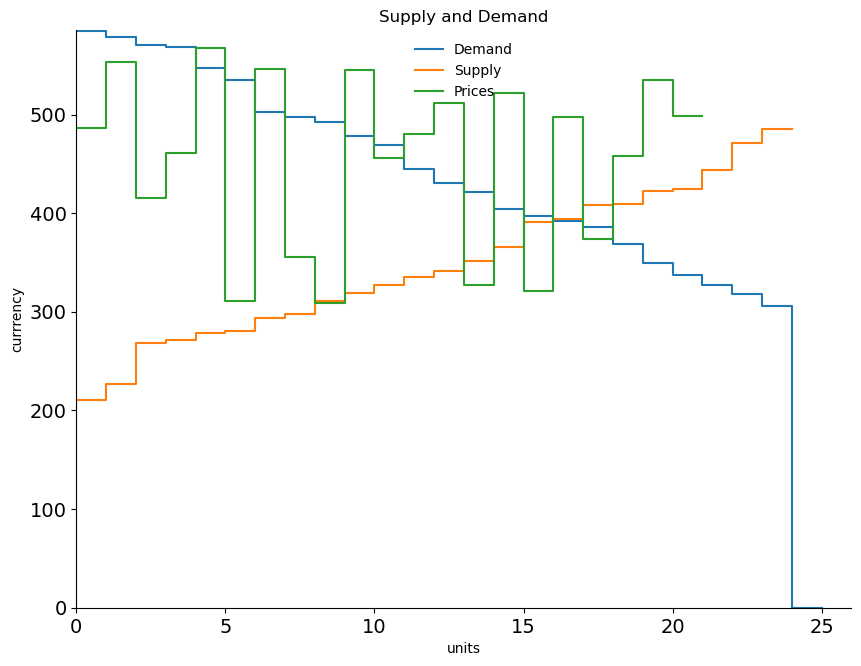

      equilibrium price range is 393.0 to 394.5
      average price = 453.85714285714283
      equilibrium expected contracts = 16.5, actual contracts = 21
      buyer surplus = 193.0, seller surplus = 2546.0
      actual_surplus = 2739.0, maximum surplus = 3053.5
      efficiency = 89.81%.



In [11]:
pr_1 = results.ProcessResults(market, sim_name, agents, contracts, debug, market_type=m_type, item_types=i_types)
pr_1.plot_prices()

pr_1.get_results()
pr_1.display_results()

# Performance


# Simulation Runner

# Simulations

## Runner with treatment lists

In [12]:
def print_contracts(contracts):
    print("CONTRACTS:")
    print("rnd, b_cu:b_val -price- s_cos:s_cu  buyer_id, seller_id")
    print("-------------------------------------------------------")
    for contract in contracts:
        round = contract[0]
        price = contract[1]
        buyer = contract[2]
        seller = contract[3]
        b_cur = contract[4]
        b_val = contract[5]
        s_cur = contract[6]
        s_cos = contract[7]
        print(f"{round:2} {b_cur:3}:{b_val:4} -{price:4}-{s_cos:4}{s_cur:3}    {buyer:10} {seller:10}")

def print_locations(agents):
    for agent in agents:
        print(f"agent {agent.name} is at location {str(agent.get_location())}")

def chk(x, index):
    """
    Checks is x is an integer or list, if a list, returns the integer at the index position
    TODO: Review why this exists?
    """
    typ = type(x)
    assert typ == int or typ == list, "bad type"
    if type(x) == int:
        return x
    elif type(x) == list:
        return x[index]
        
def make_simulation(controls, treat_key, trader_objects, period_verbose=False, debug=False):
    """Runs one complete simulation and returns data in
        effs[treatment][trial]
        period_verbose: boolean (optional) - define if the simulation should save and return each 
            period's results
        trader_object: list of ["Trader Type Name", NumTradersOfType] - defines the traders to be used in the simulation
    """
    treat_number = 0
    num_weeks = chk(controls['num_weeks'], treat_number)
    num_periods = chk(controls['num_periods'], treat_number)
    num_rounds = chk(controls['num_rounds'], treat_number)
    grid_size = chk(controls['grid_size'], treat_number)
    num_traders = chk(controls['num_traders'], treat_number)
    num_units = chk(controls['num_units'], treat_number)
    lower_bound = chk(controls['lower_bound'], treat_number)
    upper_bound = chk(controls['upper_bound'], treat_number)
    num_trials = chk(controls['num_trials'], treat_number)

    # New Controls
    m_type = controls['market_type']
    b_type = controls['bidding_type']
    i_types = controls['item_types'] 
    d_rep = controls['default_rep']

    # Setup data tsructure for effs
    effs = []
    for k, treat in enumerate(controls[treat_key]):
        subeffs = []
        for trial in range(num_trials):
            subeffs.append(0)
        effs.append(subeffs)

    ## TODO CONTINUE
    if period_verbose:
        sim_columns = ['num_weeks', 'num_periods', 'num_rounds', 'grid_size', 'num_traders', 'num_units', 'lower_bound', 'upper_bound', 'treat', 'trial', 'period', 
                               'period_contracts', 'period_locs']
        sim_data = []

    print('Started Simulation')
    for trial in range(num_trials):
        for index, treat in enumerate(controls[treat_key]):
            
            # collect controls
            num_periods = chk(controls['num_periods'], index)
            num_rounds = chk(controls['num_rounds'], index)
            grid_size = chk(controls['grid_size'], index)
            num_traders = chk(controls['num_traders'], index)
            num_units = chk(controls['num_units'], index)
            lower_bound = chk(controls['lower_bound'], index)
            upper_bound = chk(controls['upper_bound'], index)
            
            # make agents
            agent_maker = make_env.MakeAgents(num_traders, trader_objects, num_units, 
                                        grid_size, lower_bound, upper_bound, debug, market_type=m_type, item_types=i_types, default_rep=d_rep)
            agent_maker.make_agents()
            agent_maker.set_locations(grid_size)
            agents = agent_maker.get_agents()

            # set up market
            agent_maker.make_market("test_market")
            market = agent_maker.get_market()
            
            # run sim
            contracts = pd.DataFrame()

            sim_agents = copy.deepcopy(agents)  # reinitialize
            sim1 = simulate.SimPeriod(sim_name, num_rounds, sim_agents, 
                   market, grid_size, debug, plot_on, market_type=m_type, item_types=i_types, bidding_type=b_type)
            
            for period in range(num_periods):
                sim1.run_period()
                contracts = pd.concat([contracts, sim1.get_contracts()])

                # Save the effects of this period on the simuation - movement and contracts
                if period_verbose:

                    # Save starting positions for the simulation at period = -1
                    if period == 0:
                        init_locs = copy.deepcopy(sim1.get_initial_grid())
                        init_data = [num_weeks, num_periods, num_rounds, grid_size, num_traders, num_units, lower_bound, upper_bound, treat, trial, -1, 
                                       [], init_locs]
                        sim_data.append(init_data)
                    
                    period_contracts = copy.deepcopy(sim1.get_contracts())
                    period_locs = copy.deepcopy(sim1.get_grid())
                    period_data = [num_weeks, num_periods, num_rounds, grid_size, num_traders, num_units, lower_bound, upper_bound, treat, trial, period, 
                                   period_contracts, period_locs]
                    sim_data.append(period_data)
            
            # process results
            pr1 = results.ProcessResults(market, sim_name, agents, contracts, debug, market_type=m_type, item_types=i_types)
            pr1.get_results()
            effs[index][trial] = pr1.get_efficiency()
    print('Finished Simulation')

    if period_verbose:
        df_verbose = pd.DataFrame(data=sim_data, columns=sim_columns)
        return effs, df_verbose, sim1
    
    return effs



In [13]:
# Allows multiple weeks (prev above does not - later weeks one does not follow the same format or allow for multiple trials)
# Only returns dataframes
def make_simulation_wide(controls, trader_objects, debug=False, re_contracts_df=False):
    """Runs one complete simulation and returns data in
        effs[treatment][trial]
        controls: dictionary of controls for the simulation
        trader_object: list of ["Trader Type Name", NumTradersOfType] - defines the traders to be used in the simulation
        debug: boolean (optional): should the function print deep debug information
        Note: Dropped the treat_key idea - this should be done on the outside and the function should be called with the controls as a set thing
    """
    treat_number = 0
    num_trials = chk(controls['num_trials'], treat_number) # For monte carlo
    num_weeks = chk(controls['num_weeks'], treat_number) # Contain periods
    num_periods = chk(controls['num_periods'], treat_number) # Number of movement periods
    num_rounds = chk(controls['num_rounds'], treat_number) # number of trading rounds after movement
    grid_size = chk(controls['grid_size'], treat_number) # size of the grid nXn
    num_traders = chk(controls['num_traders'], treat_number) # number of traders - checks against the trader objects 
    num_units = chk(controls['num_units'], treat_number) # number of units each (selling) trader has or buying trader wants (? not sure abou this second half)
    lower_bound = chk(controls['lower_bound'], treat_number) # Minimum valuation of units
    upper_bound = chk(controls['upper_bound'], treat_number) # Maximum valuation of units

    # New Controls
    m_type = controls['market_type']
    b_type = controls['bidding_type']
    i_types = controls['item_types'] 
    d_rep = controls['default_rep']

    sim_columns = ['num_trials', 'num_weeks', 'num_periods', 'num_rounds', 'grid_size', 'num_traders', 'num_units', 'lower_bound', 'upper_bound', 
                    'trial', 'week', 'period', 'efficiency', 'type_effs', 'period_contracts', 'period_locs', 'market_type', 'bidding_type', 'default_rep']

    
    
    sim_data = []
    
    print('Started Simulation')
    for trial in range(num_trials):

        # make agents
        agent_maker = make_env.MakeAgents(num_traders, trader_objects, num_units, grid_size, lower_bound, upper_bound, debug, market_type=m_type, item_types=i_types, 
                                          default_rep=d_refp)
        agent_maker.make_agents()
        agent_maker.set_locations(grid_size)
        agents = agent_maker.get_agents()

        # set up market
        agent_maker.make_market("test_market")
        market = agent_maker.get_market()
        
        # run sim
        contracts = pd.DataFrame()
        
        for week in range(num_weeks):
            for agent in agents:
                agent.start(None)
            sim1 = simulate.SimPeriod(sim_name, num_rounds, agents, 
                   market, grid_size, debug, plot_on, week=week, market_type=m_type, item_types=i_types, bidding_type=b_type)
            for period in range(num_periods):
                sim1.run_period()
                contracts = pd.concat([contracts, sim1.get_contracts().copy()])

                # Save starting positions for the simulation at week and period = -1
                if week==0 and period == 0:
                    init_locs = copy.deepcopy(sim1.get_initial_grid())
                    init_data = [num_trials, num_weeks, num_periods, num_rounds, grid_size, num_traders, num_units, lower_bound, upper_bound, 
                                 trial, -1, -1, None, [], [], init_locs, market_type, bidding_type, default_rep]
                    sim_data.append(init_data)

                # process results
                pr1 = results.ProcessResults(market, sim_name, agents, contracts, debug)
                pr1.get_results() 
                efficiency = pr1.get_efficiency()

                type_eff = pr1.get_type_surplus()
                
                period_contracts = copy.deepcopy(sim1.get_contracts())
                period_locs = copy.deepcopy(sim1.get_grid())
                
                period_data = [num_trials, num_weeks, num_periods, num_rounds, grid_size, num_traders, num_units, lower_bound, upper_bound, 
                               trial, week, period, efficiency, type_eff, period_contracts, period_locs, market_type, bidding_type, default_rep]
                sim_data.append(period_data)

    print('Finished Simulation')

    df_verbose = pd.DataFrame(data=sim_data, columns=sim_columns)
    if re_contracts_df:
        return df_verbose, sim1, contracts
    return df_verbose, sim1

## Increase bargaining rounds

### Initialize and run

In [15]:
ZID = dm_agents.ZID     # name of agent class
ZIDA = dm_agents.ZIDA   # name of agent class
ZIDP = dm_agents.ZIDP   # name of class that accepts best offer

trader_objects = [(ZID, 5), (ZID, 5)]     # List of artificial traders, length 2, can be same
sim_name = "test_one_twoway"    # will be the folder name
plot_on = False                   # Plots each week
debug = False                     # Provide verbose information   

controls = {
    'num_weeks': 1,
    'num_periods': 1,
    'num_rounds': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'grid_size': 1,
    'num_traders': 10,
    'num_units': 6,
    'lower_bound': 200,
    'upper_bound': 600,
    'num_trials': 50, # Change if want tighter
    'market_type': "TWO_TYPE",
    'item_types': ['X','Y'],
    'bidding_type': "ABSTRACT",
    'default_rep': 100
}

key = 'num_rounds'
graph_title = 'comparison of efficiency across ' + key + " for ZID traders in two-type market"
data_table_1 = make_simulation(controls, key, trader_objects)

Started Simulation
Finished Simulation


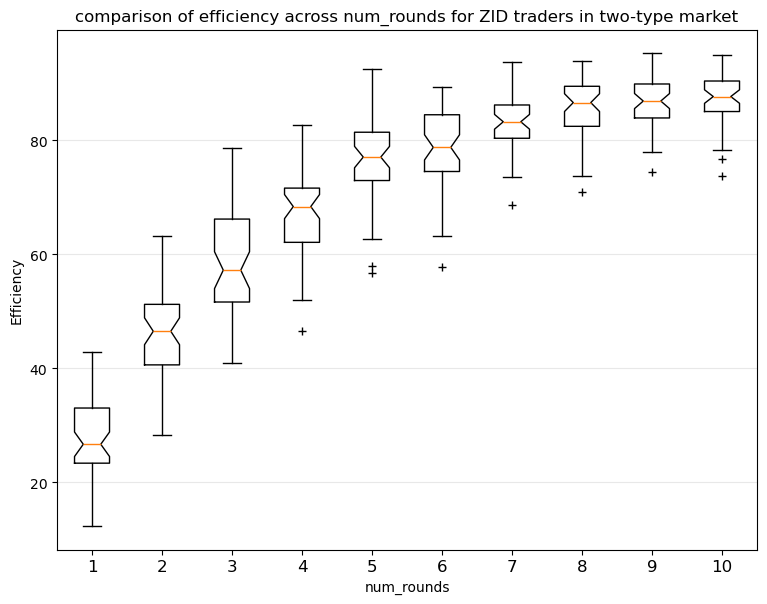

In [16]:
fig, ax1 = plt.subplots(figsize=(8, 8))
fig.canvas.manager.set_window_title('A Boxplot Example')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(data_table_1, notch=True, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set(
    axisbelow=True,  # Hide the grid behind plot objects
    title=graph_title,
    xlabel=key,
    ylabel='Efficiency',
)

ax1.set_xticklabels(controls[key], fontsize=12)

plt.show()

In [ ]:
raise ValueError("TRIPPER")

In [ ]:
ZID = dm_agents.ZID     # name of agent class
ZIDA = dm_agents.ZIDA   # name of agent class
ZIDP = dm_agents.ZIDP   # name of class that accepts best offer

trader_objects = [(ZID, 5), (ZID, 5)]     # List of artificial traders, length 2, can be same
sim_name = "test_one"    # will be the folder name 
plot_on = False                   # Plots each week
debug = False                     # Provide verbose information   

controls = {
    'num_weeks': 1,
    'num_periods': 1,
    'num_rounds': [1, 2, 3], #, 4, 5, 6, 7, 8, 9, 10],
    'grid_size': 1,
    'num_traders': 10,
    'num_units': 6,
    'lower_bound': 200,
    'upper_bound': 600,
    'num_trials': 500,
    'market_type': "ONE_TYPE",
    'item_types': ['C'],
    'bidding_type': "ABSTRACT",
    'default_rep': 100
}

key = 'num_rounds'
graph_title = 'comparison of efficiency across ' + key + " for ZID traders"
data_table_1 = make_simulation(controls, key, trader_objects)

### Graph Efficiences

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 8))
fig.canvas.manager.set_window_title('A Boxplot Example')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(data_table_1, notch=True, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set(
    axisbelow=True,  # Hide the grid behind plot objects
    title=graph_title,
    xlabel=key,
    ylabel='Efficiency',
)

ax1.set_xticklabels(controls[key], fontsize=12)

plt.show()

### Narrative

As we increase the number of bargaining rounds in a 1x1 grid the ZID agents have opportunities to make more rounds of offers. This increases the opportunity for trades and thus increases the gains from exchange.  

## Increase grid_size

### initialize and run

In [ ]:
ZID = dm_agents.ZID     # name of agent class
ZIDA = dm_agents.ZIDA   # name of agent class
ZIDP = dm_agents.ZIDP   # name of class that accepts best offer

trader_objects = [(ZID, 5), (ZID, 5)]     # List of artificial traders, length 2, can be same
sim_name = "test_one"    # will be the folder name
plot_on = False                   # Plots each week
debug = False                     # Provide verbose information   

controls = {
    'num_weeks': 1,
    'num_periods': 1,
    'num_rounds': 10,
    'grid_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'num_traders': 10,
    'num_units': 6,
    'lower_bound': 200,
    'upper_bound': 600,
    'num_trials': 500
}

key = 'grid_size'
graph_title = 'comparison of efficiency across ' + key + " for ZID traders"
data_table_2 = make_simulation(controls, key, trader_objects)


### Graph efficiencies

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 8))
fig.canvas.manager.set_window_title('A Boxplot Example')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(data_table_2, notch=True, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set(
    axisbelow=True,  # Hide the grid behind plot objects
    title=graph_title,
    xlabel=key,
    ylabel='Efficiency',
)

ax1.set_xticklabels(controls[key], fontsize=12)

plt.show()

### Narrative

## Increase Search Periods for Agents 

### Initialize and run

In [ ]:
ZID = dm_agents.ZID     # name of agent class
ZIDA = dm_agents.ZIDA   # name of agent class
ZIDP = dm_agents.ZIDP   # name of class that accepts best offer

trader_objects = [(ZID, 5), (ZID, 5)]     # List of artificial traders, length 2, can be same
sim_name = "test_one"    # will be the folder name
plot_on = False                   # Plots each week
debug = False                     # Provide verbose information   

controls = {
    'num_weeks': 1,
    'num_periods': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'num_rounds': 10,
    'grid_size': 5,
    'num_traders': 10,
    'num_units': 6,
    'lower_bound': 200,
    'upper_bound': 600,
    'num_trials': 500
}

key = 'num_periods'
graph_title = 'comparison of efficiency across ' + key + " for ZID traders"
data_table_3 = make_simulation(controls, key, trader_objects)


### Graph Efficiencies

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 8))
fig.canvas.manager.set_window_title('A Boxplot Example')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(data_table_3, notch=True, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set(
    axisbelow=True,  # Hide the grid behind plot objects
    title=graph_title,
    xlabel=key,
    ylabel='Efficiency',
)

ax1.set_xticklabels(controls[key], fontsize=12)

plt.show()

### Narrative

##  Round Effect (using Two tables)

### Initialize and Run

In [ ]:
ZID = dm_agents.ZID     # name of agent class
ZIDA = dm_agents.ZIDA   # name of agent class
ZIDP = dm_agents.ZIDP   # name of class that accepts best offer

trader_objects = [(ZID, 5), (ZID, 5)]     # List of artificial traders, length 2, can be same
sim_name = "test_one"    # will be the folder name
plot_on = False                   # Plots each week
debug = False                     # Provide verbose information   

controls = {
    'num_weeks': 1,
    'num_periods': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'num_rounds': 1,
    'grid_size': 5,
    'num_traders': 10,
    'num_units': 6,
    'lower_bound': 200,
    'upper_bound': 600,
    'num_trials': 50
}

key = 'num_periods'
graph_title = 'comparison of efficiency across ' + key + " for ZID traders"
data_table_4 = make_simulation(controls, key, trader_objects)
# for k in data_table_4:
#    print(k)

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 10))
fig.canvas.manager.set_window_title('A Boxplot Example')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(data_table_4, notch=True, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set(
    axisbelow=True,  # Hide the grid behind plot objects
    title=graph_title,
    xlabel=key,
    ylabel='Efficiency',
)

ax1.set_xticklabels(controls[key], fontsize=12)

plt.show()

### Graph Efficiencies

In [ ]:
whole_table = []
# Rearrange data in tables
for k in range(len(data_table_3)):
    whole_table.append(data_table_3[k])
    whole_table.append(data_table_4[k])
treatments = []
for k in controls['num_periods']:
    treatments.append(k)
    treatments.append(k)
print(treatments)
    


In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 10))
fig.canvas.manager.set_window_title('A Boxplot Example')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(whole_table, notch=True, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set(
    axisbelow=True,  # Hide the grid behind plot objects
    title=graph_title,
    xlabel=key,
    ylabel='Efficiency',
)

ax1.set_xticklabels(treatments, fontsize=12)

plt.show()

### Narrative

## Round effect for Grid Size 10 and 50 periods

### Init and run

In [ ]:
ZID = dm_agents.ZID     # name of agent class
ZIDA = dm_agents.ZIDA   # name of agent class
ZIDP = dm_agents.ZIDP   # name of class that accepts best offer

trader_objects = [(ZID, 10), (ZID, 10)]     # List of artificial traders, length 2, can be same
sim_name = "test_one"    # will be the folder name
plot_on = False                   # Plots each week
debug = False                     # Provide verbose information   

controls = {
    'num_weeks': 1,
    'num_periods': 30,
    'num_rounds': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'grid_size': 5,
    'num_traders': 20,
    'num_units': 10,
    'lower_bound': 200,
    'upper_bound': 600,
    'num_trials': 50
}

key = 'num_rounds'
graph_title = 'comparison of efficiency across ' + key + " for ZID traders"
data_table_5 = make_simulation(controls, key, trader_objects)

### Graph Efficiencies

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 10))
fig.canvas.manager.set_window_title('A Boxplot Example')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(data_table_5, notch=True, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set(
    axisbelow=True,  # Hide the grid behind plot objects
    title=graph_title,
    xlabel=key,
    ylabel='Efficiency',
)

ax1.set_xticklabels(controls[key], fontsize=12)

plt.show()

# Runner for comparing efficiencies between strategies 

```python
generate agent preferences
sim_weekly_runner:
    reset agent preferences
    loop through periods
        sim_period_runner:
        ...
            travel_institution:
                loop through agents:
                    request move
                    if valid move -> make move
            loop through points in grid:
            if at least one buyer and seller at point:
                bargain_institution:
                    loop through rounds:
                        loop through agents:
                            request "BID, ASK" 
                            if valid -> put in order_book
                        loop through agents in random-order:
                            request "BUY, SELL"
                            if valid -> make contract
```

In [ ]:
def make_locs(agents):
    x = []
    for agent in agents:
        y = agent.get_location()
        x.append(y)
    return x


def make_simulation_1(controls_1, trader_objects):
    """Runs one complete simulation and returns data in
        effs[treatment][trial]
    """
    
    num_weeks = controls_1['num_weeks']
    num_periods = controls_1['num_periods']
    num_rounds = controls_1['num_rounds']
    grid_size = controls_1['grid_size']
    num_traders = controls_1['num_traders']
    num_units = controls_1['num_units']
    lower_bound = controls_1['lower_bound']
    upper_bound = controls_1['upper_bound']

    m_type = controls['market_type']
    b_type = controls['bidding_type']
    i_types = controls['item_types'] 
    d_rep = controls['default_rep']

    effs = []
    locs = []
    
    # make agents
    agent_maker = make_env.MakeAgents(num_traders, trader_objects, num_units, 
                                grid_size, lower_bound, upper_bound, debug, market_type=m_typ, item_types=i_types, default_rep=d_rep)
    agent_maker.make_agents()
    agent_maker.set_locations(grid_size)
    agents = agent_maker.get_agents()

    # set up market
    agent_maker.make_market("test_market")
    market = agent_maker.get_market()

    # run sim
    locs.append(make_locs(agents))
    for week in range(num_weeks):
        week_contracts = pd.DataFrame()
        for agent in agents:
            agent.start(None)
        sim1 = simulate.SimPeriod(sim_name, num_rounds, agents, 
               market, grid_size, debug, plot_on, week=week, market_type=m_type, item_types=i_types, bidding_type=b_type)
        for period in range(num_periods):
            sim1.run_period()
            week_contracts = pd.concat([week_contracts, sim1.get_contracts()])
        
        locs.append(make_locs(agents))
        # process results
        pr1 = results.ProcessResults(market, sim_name, agents, contracts, debug, market_type=m_typ, item_types=i_types)
        pr1.get_results()
        eff = pr1.get_efficiency()
        effs.append(eff)
    
    return effs, locs



## Test ZID

In [ ]:
ZID = dm_agents.ZID     # name of agent class that moves randomly and accepts random offers
trader_objects = [(ZID, 10), (ZID, 10)]     # List of artificial traders, length 2, can be same

controls_1 = {
    'num_weeks': 100,
    'num_periods': 7,
    'num_rounds': 5,
    'grid_size': 15,
    'num_traders': 20,
    'num_units': 8,
    'lower_bound': 200,
    'upper_bound': 600,
    'market_type': "ONE_TYPE",
    'bidding_type': "ABSTRACT",
    'default_rep': 100
}

data_table_6, locs = make_simulation_1(controls_1, trader_objects)

for loc in locs:
    loc_d = {}
    for g_loc in loc:
        if g_loc in loc_d.keys():
            loc_d[g_loc] += 1
        else:
            loc_d[g_loc] = 1
    #print(len(loc_d), loc_d)

## Test ZIDA

In [ ]:
ZIDA = dm_agents.ZIDA   # name of agent class that stays at past-trasacted point
trader_objects = [(ZIDA, 10), (ZIDA, 10)]     # List of artificial traders, length 2, can be same

data_table_7, locs = make_simulation_1(controls_1, trader_objects)
for loc in locs:
    loc_d = {}
    for g_loc in loc:
        if g_loc in loc_d.keys():
            loc_d[g_loc] += 1
        else:
            loc_d[g_loc] = 1
    #print(len(loc_d), loc_d)

## Compare ZID and ZIDA efficiencies grid_size = 10

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))  
ax.plot(data_table_7, label = 'ZIDA', linestyle = 'dashed', color='blue', lw =3)
ax.plot(data_table_6, label = 'ZID', linestyle = (0, (1, 2)), color='red', lw =3)

ax.set_xlabel('week', size = 'x-large') 
ax.set_xbound(0, 50)
ax.set_ybound(0, 100)
ax.grid(1)
ax.set_ylabel('efficiency', size = 'x-large') 
ax.set_title('Comparing ZID to ZIDA strategies', size = 'x-large')
ax.legend(fontsize='x-large')

## Test ZIDPA

In [ ]:
ZIDPA = dm_agents.ZIDPA # Class of Agent that stay at past-transacted point and accepts best offer

trader_objects = [(ZIDPA, 10), (ZIDPA, 10)]     # List of artificial traders, length 2, can be same

data_table_8, locs = make_simulation_1(controls_1, trader_objects)
for loc in locs:
    loc_d = {}
    for g_loc in loc:
        if g_loc in loc_d.keys():
            loc_d[g_loc] += 1
        else:
            loc_d[g_loc] = 1
    #print(len(loc_d), loc_d)

## Compare ZID, ZIDA, and ZIDPA efficiencies grid_size = 10

In [ ]:
fig, ax = plt.subplots()
ax.plot(data_table_8, label = 'ZIDPA')
ax.plot(data_table_7, label = 'ZIDA')
ax.plot(data_table_6, label = 'ZID')
ax.set_xlabel('week') 
ax.set_ylabel('efficiency') 
ax.set_title('Comparing ZID to ZIDA and ZIDPA strategies')
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(data_table_8, label = 'ZIDPA', linestyle = 'solid', color='green', lw =3)
ax.plot(data_table_7, label = 'ZIDA', linestyle = 'dotted', color='blue', lw =3)
ax.plot(data_table_6, label = 'ZID', linestyle = (0, (1, 2)), color='red', lw =3)

ax.set_xlabel('week', size = 'x-large') 
ax.set_xbound(0, 50)
ax.set_ybound(0, 100)
ax.grid(1)
ax.set_ylabel('efficiency', size = 'x-large') 
ax.set_title('Comparing ZID to ZIDA strategies', size = 'x-large')
ax.legend(fontsize='x-large')

## Test ZIDPR

In [ ]:
ZIDPR = dm_agents.ZIDPR # Class of Agent that stay at past-transacted point, unless that point is too congested, and accepts best offer
trader_objects = [(ZIDPR,10), (ZIDPR,10)]     # List of artificial traders, length 2, can be same
data_table_9, locs = make_simulation_1(controls_1, trader_objects)
for loc in locs:
    loc_d = {}
    for g_loc in loc:
        if g_loc in loc_d.keys():
            loc_d[g_loc] += 1
        else:
            loc_d[g_loc] = 1
    #print(len(loc_d), loc_d)

## Compare ZID, ZIDA,  ZIDPA and ZIDPR efficiencies grid_size = 10

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(data_table_8, label = 'ZIDPA')
ax.plot(data_table_9, label = 'ZIDPR')
ax.plot(data_table_7, label = 'ZIDA')
ax.plot(data_table_6, label = 'ZID')
ax.set_xlabel('week') 
ax.set_ylabel('efficiency') 
ax.set_title('Comparing Movement and Bargaining Strategies')
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(data_table_9, label = 'ZIDPR', linestyle = 'solid', color='cyan', lw =3)
ax.plot(data_table_8, label = 'ZIDPA', linestyle = 'solid', color='green', lw =3)
ax.plot(data_table_7, label = 'ZIDA', linestyle = (0, (1, 2)), color='blue', lw =3)
ax.plot(data_table_6, label = 'ZID', linestyle = (0, (1, 2)), color='red', lw =3)

ax.set_xlabel('week', size = 'x-large') 
ax.set_xbound(0, 100)
ax.set_ybound(0, 100)
ax.grid(1)
ax.set_ylabel('efficiency', size = 'x-large') 
ax.set_title('Comparing strategies', size = 'x-large')
ax.legend(fontsize='x-large')

# Compare agent strategies/types competing within periods

## Runner for running weeks

In [ ]:
def make_simulation_2(controls_2, trader_objects):
    """Runs one complete simulation and returns data in
        effs[treatment][trial]
    """ 
    
    num_weeks = controls_2['num_weeks']
    num_periods = controls_2['num_periods']
    num_rounds = controls_2['num_rounds']
    grid_size = controls_2['grid_size']
    num_traders = controls_2['num_traders']
    num_units = controls_2['num_units']
    lower_bound = controls_2['lower_bound']
    upper_bound = controls_2['upper_bound']

    m_type = controls_2['market_type']
    b_type = controls_2['bidding_type']
    i_types = controls_2['item_types'] 
    d_rep = controls_2['default_rep']

    effs = []
    type_effs = []
    locs = []
    
    
    # make agents
    agent_maker = make_env.MakeAgents(num_traders, trader_objects, num_units, 
                                grid_size, lower_bound, upper_bound, debug, market_type=m_type, item_types=i_types, default_rep=d_rep)
    agent_maker.make_agents()
    agent_maker.set_locations(grid_size)
    agents = agent_maker.get_agents()

    # set up market
    agent_maker.make_market("test_market")
    market = agent_maker.get_market()

    # run sim
    locs.append(make_locs(agents))
    for week in range(num_weeks):
        for agent in agents:
            agent.start(None)
        contracts = []
        sim1 = simulate.SimPeriod(sim_name, num_rounds, agents, 
               market, grid_size, debug, plot_on, week=week, market_type=m_type, item_types=i_types, bidding_type=b_type)
        for period in range(num_periods):
            sim1.run_period()
            contracts.extend(sim1.get_contracts())
        
        locs.append(make_locs(agents))
        # process results
        pr1 = results.ProcessResults(market, sim_name, agents, contracts, debug, market_type=m_type, item_types=i_types)
        pr1.get_results()
        eff = pr1.get_efficiency()
        effs.append(eff)
        type_eff = pr1.get_type_surplus()
        type_effs.append(type_eff)  
    return effs, type_effs, locs



### Initialize and run ZID vs ZIDP

In [ ]:
ZID = dm_agents.ZID     # name of agent class that makes random moves, accepts random offers
ZIDP = dm_agents.ZIDP   # name of class that accepts best offer

trader_objects = [(ZID, 10), (ZIDP, 10)]     # List of artificial traders, length 2, can be same 

controls_2 = {
    'num_weeks': 100,
    'num_periods': 7,
    'num_rounds': 5,
    'grid_size': 1,
    'num_traders': 20,
    'num_units': 8,
    'lower_bound': 200,
    'upper_bound': 600
}

data_table_10, data_table_11, locs = make_simulation_2(controls_2, trader_objects)

ZID_surplus = []
ZIDP_surplus = []
for type_surplus in data_table_11:
    if 'ZID' in type_surplus:
        ZID_surplus.append(type_surplus['ZID'])
    else:
        ZID_surplus.append(0)
    if 'ZIDP' in type_surplus:
        ZIDP_surplus.append(type_surplus['ZIDP'])
    else:
        ZIDP_surplus.append(0)   

data_table_12 = [ZID_surplus, ZIDP_surplus]

"""
for loc in locs:
    loc_d = {}
    for g_loc in loc:
        if g_loc in loc_d.keys():
            loc_d[g_loc] += 1
        else:
            loc_d[g_loc] = 1
    print(len(loc_d), loc_d)
"""

### Graph Efficiencies

In [ ]:
fig, ax = plt.subplots()  
ax.plot(data_table_10, label = 'ZID and ZIDP')
ax.set_xlabel('week') 
ax.set_ylabel('efficiency') 
ax.set_title('Efficiencies for ZID and ZIDP')
ax.legend()

In [ ]:
fig, ax = plt.subplots()  
ax.plot(ZID_surplus, label = 'ZID')
ax.plot(ZIDP_surplus, label = 'ZIDP')
ax.set_xlabel('week') 
ax.set_ylabel('efficiency') 
ax.set_title('Comparing actual surplus of ZID and ZIDP strategies')
ax.legend()

## Runner for running weeks

In [ ]:
# Deprecated with the inclusion of weeks in controls for the make_simulation function
def make_simulation_weeks(controls, trader_objects, debug=False):
    """Runs one complete simulation and returns data in
        effs[treatment][trial]
    """ 

    treat_number = 0
    num_weeks = chk(controls['num_weeks'], treat_number)
    num_periods = chk(controls['num_periods'], treat_number)
    num_rounds = chk(controls['num_rounds'], treat_number)
    grid_size = chk(controls['grid_size'], treat_number)
    num_traders = chk(controls['num_traders'], treat_number)
    num_units = chk(controls['num_units'], treat_number)
    lower_bound = chk(controls['lower_bound'], treat_number)
    upper_bound = chk(controls['upper_bound'], treat_number)
    num_trials = chk(controls['num_trials'], treat_number)

    m_type = controls['market_type']
    b_type = controls['bidding_type']
    i_types = controls['item_types'] 
    d_rep = controls['default_rep']
    
    effs = []
    type_effs = []
    locs = []
  
    # make agents
    agent_maker = make_env.MakeAgents(num_traders, trader_objects, num_units, 
                                grid_size, lower_bound, upper_bound, debug, market_type=m_type, item_types=i_types, default_rep=d_rep)
    agent_maker.make_agents()
    agent_maker.set_locations(grid_size)
    agents = agent_maker.get_agents()

    # set up market
    agent_maker.make_market("test_market")
    market = agent_maker.get_market()

    # run sim
    locs.append(make_locs(agents))
    for week in range(num_weeks):
        week_cont = pd.DataFrame()
        for agent in agents:
            agent.start(None)
        sim1 = simulate.SimPeriod(sim_name, num_rounds, agents, 
               market, grid_size, debug, plot_on, week=week, market_type=m_type, item_types=i_types, bidding_type=b_type)
        for period in range(num_periods):
            sim1.run_period()
            week_cont = pd.concat([week_cont, sim1.get_contracts()])
        
        locs.append(make_locs(agents))
        # process results
        pr1 = results.ProcessResults(market, sim_name, agents, contracts, debug, market_type=m_type, item_types=i_types)
        pr1.get_results()
        eff = pr1.get_efficiency()
        effs.append(eff)
        type_eff = pr1.get_type_surplus()
        type_effs.append(type_eff)  
    return effs, type_effs, locs



## Runner for monte carlo simulations

In [ ]:
num_trials = 100
ZID = dm_agents.ZID     # name of agent class
ZIDA = dm_agents.ZIDA   # name of agent class
trader_objects =[(ZID, 20)]

controls = {
    'num_trials': 10,
    'num_weeks': 50,
    'num_periods': 7,
    'num_rounds': 5,
    'grid_size': 15,
    'num_traders': 20,
    'num_units': 8,
    'lower_bound': 200,
    'upper_bound': 600
}

ex_sim_df, ex_sim = make_simulation_wide(controls, trader_objects)

In [ ]:
ex_sim_df.loc[0] # Initial location of the first trial

In [ ]:
ex_sim_df.loc[1] # First period move + trades of first trial

## Compare ZID vs ZIDA

In [ ]:
ZID = dm_agents.ZID     # name of agent class
ZIDA = dm_agents.ZIDA   # name of agent class
ZIDP = dm_agents.ZIDP   # name of class that accepts best offer

trader_objects = [(ZID, 10), (ZIDA, 10)]     # List of artificial traders, length 2, can be same
sim_name = "test_one"    # will be the folder name
plot_on = False                   # Plots each week
debug = False                     # Provide verbose information   

controls = {
    'num_trials': 1,
    'num_weeks': 50,
    'num_periods': 7,
    'num_rounds': 5,
    'grid_size': 15,
    'num_traders': 20,
    'num_units': 8,
    'lower_bound': 200,
    'upper_bound': 600
}


data_table_13, data_table_14, locs = make_simulation_weeks(controls, trader_objects)

ZID_surplus = []
ZIDA_surplus = []

for type_surplus in data_table_14:
    if 'ZID' in type_surplus:
        ZID_surplus.append(type_surplus['ZID'])
    else:
        ZID_surplus.append(0)
    if 'ZIDA' in type_surplus:
        ZIDA_surplus.append(type_surplus['ZIDA'])
    else:
        ZIDA_surplus.append(0)   

data_table_15 = [ZID_surplus, ZIDA_surplus]

"""
for loc in locs:
    loc_d = {}
    for g_loc in loc:
        if g_loc in loc_d.keys():
            loc_d[g_loc] += 1
        else:
            loc_d[g_loc] = 1
    print(len(loc_d), loc_d)
"""

In [ ]:
fig, ax = plt.subplots()  
ax.plot(ZID_surplus, label = 'ZID')
ax.plot(ZIDA_surplus, label = 'ZIDA')
ax.set_xlabel('week') 
ax.set_ylabel('efficiency') 
ax.set_title('Comparing actual surplus of ZID and ZIDA strategies')
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(ZID_surplus, label = 'ZID', linestyle = (0, (1, 2)), color='red', lw =3)
ax.plot(ZIDA_surplus, label = 'ZIDA', linestyle = (0, (1, 2)), color='blue', lw =3)

ax.set_xlabel('week', size = 'x-large') 
ax.set_xbound(0, controls['num_weeks'])
ax.set_ybound(0, 7000)
ax.grid(1)
ax.set_ylabel('surplus', size = 'x-large') 
ax.set_title('Comparing ZID to ZIDA strategies', size = 'x-large')
ax.legend(fontsize='x-large')

In [ ]:
fig, ax = plt.subplots()  
ax.plot(data_table_13, label = 'ZID and ZIDA')
ax.set_xlabel('week') 
ax.set_ylabel('efficiency') 
ax.set_title('Efficiencies for ZID and ZIDA')
ax.legend()

## Compare ZIDPA vs ZIDA

In [ ]:
ZID = dm_agents.ZID       # name of agent class
ZIDA = dm_agents.ZIDA     # name of agent class
ZIDP = dm_agents.ZIDP     # name of class that accepts best offer
ZIDPA = dm_agents.ZIDPA 

trader_objects = [(ZIDPA, 10), (ZIDA, 10)]     # List of artificial traders, length 2, can be same

controls = {
    'num_trials': 1,
    'num_weeks': 50,
    'num_periods': 7,
    'num_rounds': 5,
    'grid_size': 15,
    'num_traders': 20,
    'num_units': 8,
    'lower_bound': 200,
    'upper_bound': 600
}

data_table_16, data_table_17, locs = make_simulation_weeks(controls, trader_objects)

ZIDPA_surplus = []
ZIDA_surplus = []
for type_surplus in data_table_17[1:]:
    ZIDPA_surplus.append(type_surplus['ZIDPA'])
    ZIDA_surplus.append(type_surplus['ZIDA'])

data_table_18 = [ZIDPA_surplus, ZIDA_surplus]


for loc in locs:
    loc_d = {}
    for g_loc in loc:
        if g_loc in loc_d.keys():
            loc_d[g_loc] += 1
        else:
            loc_d[g_loc] = 1
    #print(len(loc_d), loc_d)


In [ ]:
fig, ax = plt.subplots()  
ax.plot(ZIDPA_surplus, label = 'ZIDPA')
ax.plot(ZIDA_surplus, label = 'ZIDA')
ax.set_xlabel('week') 
ax.set_ylabel('efficiency') 
ax.set_title('Comparing actual surplus of ZIDPA and ZIDA strategies')
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(ZIDPA_surplus, label = 'ZIDPA', linestyle = 'solid', color='green', lw =3)
ax.plot(ZIDA_surplus, label = 'ZIDA', linestyle = (0, (1, 2)), color='blue', lw =3)

ax.set_xlabel('week', size = 'x-large') 
ax.set_xbound(0, controls['num_weeks'])
ax.set_ybound(0, 9000)
ax.grid(1)
ax.set_ylabel('surplus', size = 'x-large') 
ax.set_title('Comparing ZIDPA to ZIDA strategies', size = 'x-large')
ax.legend(fontsize='x-large')

In [ ]:
fig, ax = plt.subplots()  
ax.plot(data_table_16, label = 'ZIDA and ZIDPA')
ax.set_xlabel('week') 
ax.set_ylabel('efficiency') 
ax.set_title('50% ZIDA and 50% ZIDP')
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(data_table_16, label = 'ZIDA and ZIDPA', linestyle = 'solid', color='blue', lw =3)
ax.set_xlabel('week', size = 'x-large') 
ax.set_xbound(0, controls['num_weeks'])
ax.set_ybound(0, 110)
ax.grid(1)
ax.set_ylabel('efficiency', size = 'x-large') 
ax.set_title('50% ZIDA and 50% ZIDP', size = 'x-large')
ax.legend(fontsize='x-large')

## Compare ZIDPA to ZIDPR

In [ ]:
ZID = dm_agents.ZID       # name of agent class
ZIDA = dm_agents.ZIDA     # name of agent class
ZIDP = dm_agents.ZIDP     # name of class that accepts best offer
ZIDPA = dm_agents.ZIDPA 
ZIDPR = dm_agents.ZIDPR 
trader_objects = [(ZIDPA, 10), (ZIDPR,10)]     # List of artificial traders, length 2, can be same

controls = {
    'num_trials': 1,
    'num_weeks': 100,
    'num_periods': 7,
    'num_rounds': 5,
    'grid_size': 15,
    'num_traders': 20,
    'num_units': 8,
    'lower_bound': 200,
    'upper_bound': 600
}

data_table_19, data_table_20, locs = make_simulation_weeks(controls, trader_objects)

ZIDPA_surplus = []
ZIDPR_surplus = []
for type_surplus in data_table_20:
    if 'ZIDPA' in type_surplus:
        ZIDPA_surplus.append(type_surplus['ZIDPA'])
    else:
        ZIDPA_surplus.append(0)
    if 'ZIDPR' in type_surplus:
        ZIDPR_surplus.append(type_surplus['ZIDPR'])
    else:
        ZIDPR_surplus.append(0)   


data_table_21 = [ZIDPA_surplus, ZIDPR_surplus]



In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))  
ax.plot(ZIDPA_surplus, label = 'ZIDPA')
ax.plot(ZIDPR_surplus, label = 'ZIDPR')
ax.set_xlabel('week') 
ax.set_ylabel('surplus') 
ax.set_title('Comparing actual surplus of ZIDPA and ZIDPR strategies')
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(ZIDPA_surplus, label = 'ZIDPA', linestyle = 'dashed', color='magenta', lw =3)
ax.plot(ZIDPR_surplus, label = 'ZIDPR', linestyle = 'solid', color='cyan', lw =3)
ax.set_xlabel('week', size = 'x-large') 
ax.set_xbound(0, controls['num_weeks'])
ax.set_ybound(0, 7000)
ax.grid(1)
ax.set_ylabel('surplus', size = 'x-large') 
ax.set_title('Comparing ZIDPA to ZIDPR strategies', size = 'x-large')
ax.legend(fontsize='x-large')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))  
ax.plot(data_table_19, label = 'ZIDPA and ZIDPR')
ax.plot(data_table_8, label = 'ZIDPA and ZIDPA')
ax.plot(data_table_9, label = 'ZIDPR and ZIDPR')
ax.set_xlabel('week') 
ax.set_ylabel('efficiency') 
ax.set_title('Efficiencies for ZIDPA and ZIDPR')
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(data_table_19, label = '50% ZIDPA and 50% ZIDPR', linestyle = 'dashed', color='magenta', lw =3)
ax.plot(data_table_8, label = '100% ZIDPA', linestyle = 'solid', color='green', lw =3)
ax.plot(data_table_9, label = '100% ZIDPR', linestyle = 'solid', color='cyan', lw =3)
ax.set_xlabel('week', size = 'x-large') 
ax.set_xbound(0, 50)
ax.set_ybound(0, 100)
ax.grid(1)
ax.set_ylabel('efficiency', size = 'x-large') 
ax.set_title('Effect of 50% Distancing', size = 'x-large')
ax.legend(fontsize='x-large')

# Regressions

In [ ]:
ZIDPA = dm_agents.ZIDPA 
ZIDPR = dm_agents.ZIDPR 

zidpr_vals = [0, 2, 4, 6, 8, 10]
graphs_data = dict()
surplus_data = dict()
tot_traders = 20

for num_zidpr in zidpr_vals:
    
    trader_objects = [(ZIDPA, tot_traders-num_zidpr), (ZIDPR,num_zidpr)]     # List of artificial traders, length 2, can be same

    controls = {
        'num_trials': 1,
        'num_weeks': 50,
        'num_periods': 7,
        'num_rounds': 5,
        'grid_size': 15,
        'num_traders': 20,
        'num_units': 8,
        'lower_bound': 200,
        'upper_bound': 600
    }

    data_table_EFF, data_table_DESC, locs = make_simulation_weeks(controls, trader_objects)
    
    graphs_data[num_zidpr] = data_table_EFF
    
    ZIDPA_surplus = []
    ZIDPR_surplus = []
    for type_surplus in data_table_20:
        if 'ZIDPA' in type_surplus:
            ZIDPA_surplus.append(type_surplus['ZIDPA'])
        else:
            ZIDPA_surplus.append(0)
        if 'ZIDPR' in type_surplus:
            ZIDPR_surplus.append(type_surplus['ZIDPR'])
        else:
            ZIDPR_surplus.append(0)   


    data_table_SURPLUS = [ZIDPA_surplus, ZIDPR_surplus]
    surplus_data[num_zidpr] = data_table_SURPLUS
    

In [ ]:
ZIDPA = dm_agents.ZIDPA 
ZIDPR = dm_agents.ZIDPR 

zidpr_vals = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20] # Number of zidpr (social distancing) traders in the simulation
tot_traders = 20

iterations = 20 # Rows 
avg_data = np.empty((iterations, len(zidpr_vals)))
last_data = np.empty((iterations, len(zidpr_vals))) 
for iteration in range(iterations):
    graphs_data = dict()
    surplus_data = dict()
    
    for i, num_zidpr in enumerate(zidpr_vals):
        
        trader_objects = [(ZIDPA, tot_traders-num_zidpr), (ZIDPR,num_zidpr)]     # List of artificial traders, length 2, can be sam
        
        controls = {
            'num_trials': 1,
            'num_weeks': 50,
            'num_periods': 7,
            'num_rounds': 5,
            'grid_size': 15,
            'num_traders': 20,
            'num_units': 8,
            'lower_bound': 200,
            'upper_bound': 600
        }    

        data_table_EFF, data_table_DESC, locs = make_simulation_weeks(controls, trader_objects)

        graphs_data[num_zidpr] = data_table_EFF
        
        # TODO remake with pandas frames
        avg_data[iteration][i] = np.mean(data_table_EFF)
        last_data[iteration][i] = data_table_EFF[-1]        
        

In [ ]:
avg_dataframe = pd.DataFrame(data=avg_data, columns=zidpr_vals)
last_dataframe = pd.DataFrame(data=last_data, columns=zidpr_vals)

In [ ]:
last_dataframe.T.stack()

In [ ]:
#result_avg = linregress(avg_dataframe[avg_dataframe.columns[1:]].T,y=avg_dataframe['index'].T)

In [ ]:
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

In [ ]:
stacked_avg = avg_dataframe.T.stack()
stacked_avg = stacked_avg.reset_index()
stacked_avg = stacked_avg.rename(columns={'level_0':'num_zidpr', 'level_1':'trial', 0: 'efficiency'})
stacked_avg

In [ ]:
# Avg Efficiency Regression
X = stacked_avg[['num_zidpr']]
Y = stacked_avg[['efficiency']]
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)  # regress
Y_pred = linear_regressor.predict(X)  # fitted

In [ ]:
linear_regressor.coef_

In [ ]:
plt.scatter(X.stack(), Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [ ]:
stacked_trm = last_dataframe.T.stack()
stacked_trm = stacked_trm.reset_index()
stacked_trm = stacked_trm.rename(columns={'level_0':'num_zidpr', 'level_1':'trial', 0: 'efficiency'})
stacked_trm

In [ ]:
# Terminal Efficiency Regression
X = stacked_trm[['num_zidpr']]
Y = stacked_trm[['efficiency']]
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y)  # regress
Y_pred = linear_regressor.predict(X)  # fitted

In [ ]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [ ]:
linear_regressor.coef_

# Visualization of Agent Actions

In [ ]:
controls = {
    'num_trials': 2,
    'num_weeks': 10,
    'num_periods': 10,
    'num_rounds': 10,
    'grid_size': 10,
    'num_traders': 10,
    'num_units': 6,
    'lower_bound': 200,
    'upper_bound': 600    
}

sim_df, sim_t = make_simulation_wide(controls, trader_objects=[[ZID, 10]])

In [ ]:
sim_df.head()

In [ ]:
# Display (Relevant) Columns
control_cols = ['num_trials', 'num_weeks', 'num_periods', 'num_rounds', 'grid_size', 'num_traders', 'num_units', 'lower_bound', 'upper_bound']
    
sim_df[list(set(sim_df.columns) - set(control_cols))]

In [ ]:
# Format: Round, Contract Price, Buyer, Seller, 
# ex_contract = (round, price, buyer_id, seller_id, b_cur_unit, b_cur_value, s_cur_unit, s_cur_cost)
# In so far as I understand this correctly - cur_value is the subjective valuation of the unit under contract from the perspective of the buyer and of the seller
# and the cur_unit number number is which unit it is (0 indexed)
# Aslo note these are only successful contracts, not attempted contracts
# Round number indicates in which round of in-place market operations the contract took place - there can be many rounds in a period - here there is 10
sim_df.loc[1].period_contracts

In [ ]:
# Initial Location of agents
sim_df.loc[0].period_locs

In [ ]:
# Effect of one period movement
sim_df.loc[1].period_locs

In [ ]:
def three_d_grid(grid_size):
    """Transforms a grid size into a projected-vector 3d grid - represented as a nm and mn vectors"""    
    # create dimmensions - currently only for square grid of nXn
    colnames = ['D1', 'D2']
    grid_base = []
    n = np.arange(grid_size)
    m = np.arange(grid_size)
    for n1 in n:
        for m1 in m:
            grid_base.append([n1, m1])

    grid_df = pd.DataFrame(data=grid_base, columns=colnames)
    return grid_df

def plottable_locs(locs, grid_df, investigated="Agents"):
    """Plots a location-agents dictionary onto a 3d grid based projects vectors"""
    grid_new = grid_df.copy()
    grid_new[investigated] = 0
    for loc in locs.keys():
        agent_at_key = len(locs[loc])
        d1 = loc[0]
        d2 = loc[1]
        spot_ind = grid_new[(grid_new['D1'] == d1) & (grid_new['D2'] == d2)].index
        grid_new[investigated].iloc[spot_ind] = agent_at_key
    return grid_new

In [ ]:
# Project inital onto space
gd_size = sim_df['grid_size'][0]
ex_grid = three_d_grid(gd_size)
init_plotted = plottable_locs(sim_df.loc[0].period_locs, ex_grid)
# Display non-zero locations
nz_inds = init_plotted['Agents'].to_numpy().nonzero()
init_plotted.iloc[nz_inds]

In [ ]:
first_plotted = plottable_locs(sim_df.loc[1].period_locs, ex_grid)
nz_inds = first_plotted['Agents'].to_numpy().nonzero()
first_plotted.iloc[nz_inds]

In [ ]:
def collate_loc_plots(sim_df, investigated="Agents"):
    """Create large stacked DF with agent locations for every trial, week, and period
        sim_df: dataframe of results
        investigated: the value to report in the collated plotted grid df
        
        returns:
            dataframe of stacked form with the grid and observed vars at the points per trial, week, period
    """
    num_trials = sim_df['num_trials'].loc[0]
    num_weeks = sim_df['num_weeks'].loc[0]
    num_periods = sim_df['num_periods'].loc[0]
    num_rounds = sim_df['num_rounds'].loc[0]
    grid_size = sim_df['grid_size'].loc[0]
    num_traders = sim_df['grid_size'].loc[0]

    grd = three_d_grid(grid_size)
    
    control_cols = ['num_trials', 'num_weeks', 'num_periods', 'num_rounds', 'grid_size', 'num_traders', 'num_units', 'lower_bound', 'upper_bound']
    rel_df = sim_df[list(set(sim_df.columns) - set(control_cols))]

    out_df = pd.DataFrame()

    # Traverse the simulation df and save stacked plots
    for trial in range(num_trials):
        trial_df = rel_df[rel_df['trial']==trial]
        init_ind = trial_df[(trial_df['week']==-1) & (trial_df['period']==-1)].index
        init_loc = trial_df['period_locs'].loc[init_ind].values[0]
        init_plot = plottable_locs(init_loc, grd)
        init_plot['trial'] = trial
        init_plot['week'] = -1
        init_plot['period'] = -1
        out_df = pd.concat([out_df, init_plot])
        for week in range(num_weeks):
            week_df = trial_df[trial_df['week']==week]
            for period in range(num_periods):
                per_ind = week_df[week_df['period']==period].index
                per_loc = week_df['period_locs'].loc[per_ind].values[0]
                per_plot = plottable_locs(per_loc, grd)
                per_plot['trial'] = trial
                per_plot['week'] = week
                per_plot['period'] = period
                out_df = pd.concat([out_df, per_plot])

    return out_df
                


In [ ]:
locs_plot_df = collate_loc_plots(sim_df, investigated="Agents")
locs_plot_df

In [ ]:
def graph_plotted(plotted, title_val=None, hue_val="Agents", hue_norm_val=(0, 1), size_val="Agent", size_norm_val=(0, 1), legend=False, pallatte="hot_r",
                 integer_bar=True, subtitle=False):
    """Visualize the data on a 2D grid to show the locations and values of the investigated value"""
    
    g = sns.relplot(
        data=plotted,
        x="D1", y="D2", hue=hue_val, size="Agents",
        palette=pallatte, hue_norm=hue_norm_val, edgecolor=".7",
        height=10, sizes=(35, 400), size_norm=size_norm_val, legend=False
    )

    if not subtitle:
        subtitle = ""
    
    # Tweak the figure to finalize
    g.set(xlabel=subtitle, ylabel="", aspect="equal", xticks=[], yticks=[], xticklabels=[], yticklabels=[], title=title_val)
    g.despine(left=True, bottom=True)
    g.ax.margins(.03)
    plt.grid()

    if legend:
        bar = fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm_val, cmap=palette),
             ax=plt.gca(), label=hue_val, aspect=100, shrink=0.8)
        
        if integer_bar:
            bar.locator = tckr.MaxNLocator(integer=True)
        

    return g

In [ ]:
plotted = init_plotted
title_val="Hue Norm test"
hue_val="Agents"
#hue_norm_val=(-1, 1)
hue_norm_val= colors.Normalize(vmin=0, vmax=10)
size_val="Agent"
size_norm_val=hue_norm_val
legend=True
# palette = "YlOrRd"
palette = "hot_r"
integer_bar = True

graph_plotted(plotted, title_val=title_val, hue_val=hue_val, hue_norm_val=hue_norm_val, size_val=size_val, size_norm_val=size_norm_val, legend=legend, pallatte=palette,
                 integer_bar=integer_bar)

plt.grid(False)

In [ ]:
# Show example visualization as a relplot 
# here size and color are the same metric - they are both number of agents
# Ideas for future - add local price or local efficiency at as color
title="Example Initial Location of ZID Agents"
graph_plotted(init_plotted, title_val=title)
plt.show()

In [ ]:
title="Example First-Period Location of ZID Agents"
graph_plotted(first_plotted, title_val=title)
plt.show()

In [ ]:
last_plotted = plottable_locs(sim_df.loc[10].period_locs, ex_grid)
title="Example 10th- (Last)-Period Location of ZID Agents"
graph_plotted(last_plotted, title_val=title)
plt.show()

In [ ]:
title="Example Relative Normed"
hue_norm_rel = colors.Normalize(vmin=0, vmax=np.max(last_plotted['Agents'])) # Relative normalization - to max observed
graph_plotted(last_plotted, title_val=title, hue_norm_val=hue_norm_rel, legend=True)
plt.show()

In [ ]:
# def graph_plotted(plotted, title_val=None, hue_val="Agents", hue_norm_val=(-1, 1), size_val="Agent", size_norm_val=(-0.2, 0.8)):
title="Example Absolute Normed"
hue_norm_abs = colors.Normalize(vmin=0, vmax=10) # Absolute normalization - to max possible val - here 10
graph_plotted(last_plotted, title_val=title, hue_norm_val=hue_norm_abs, size_norm_val=hue_norm_abs, legend=True)
plt.show()

In [ ]:
import moviepy.video.io.ImageSequenceClip
from PIL import Image, ImageFile
# import PIL and PIL.ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

default_movie_stem = "loc_movie"
default_graph_folder = "loc_plots"
if not os.path.isdir(default_graph_folder):
    os.mkdir(default_graph_folder)

def to_len_str(number, str_len):
    base_str = str(number)
    new_str = '0'*(str_len-len(base_str)) + base_str
    return new_str

def movie_plotted(collated_plotted, movie_name=None, graph_folder=None, title_val=None, hue_val="Agents", size_val="Agents", scale="relative", hue_max=None, 
                  size_max=None, week_max=None, period_max=None, include_init=True, fps=1, subtitle=True):
    """
    collated_plotted: one trial (or an average of trials) plotted using 
    movie_name: The name to save the movie under (if not provided - uses default for the notebook + timestamp)
    graph_folder: The name of the folder to save the graphs in (if not provided - uses default for the notebook + new folder timestamp)
    title_val: what title to use
    hue_val: what to place the hue on
    size_val: what to place size on
    scale: the way in which normalization will be applied to graph hues and sizes
    hue_max: used for normalization of hue in absolute scale case
    size_max: used for normalization of size in absolute scale case
    """
    timestamp = int(time.time()*1000000) # integer to not have issues with os
    if graph_folder is None:
        graph_folder = default_graph_folder + "/plots_" + str(timestamp)
    else:
        graph_folder = default_graph_folder + "/" + graph_folder
        
    if movie_name is None:
        movie_name = graph_folder + "/movie.mp4"
    else:
        movie_name = graph_folder + "/" + movie_name
        
    if scale == "absolute":
        if hue_max is None:
            raise ValueError("Hue max must be defined for absolute scaling")
        if size_max is None:
            raise ValueError("Size max must be defined for absolute scaling")
    elif scale == "relative":
        hue_max = np.max(collated_plotted[hue_val])
        size_max = np.max(collated_plotted[size_val])
        
    hue_norm = colors.Normalize(vmin=0, vmax=hue_max)
    size_norm = colors.Normalize(vmin=0, vmax=size_max)
    
    # Check if directories exists
    if not os.path.isdir(graph_folder):
        os.mkdir(graph_folder)

    if os.path.isfile(movie_name):
        raise ValueError("Movie name already used")

    if week_max is None:
        week_max = np.max(collated_plotted['week'])

    week_digits = len(str(week_max))

    if period_max is None:
        period_max = np.max(collated_plotted['period'])

    period_digits = len(str(week_max))

    img_names = []
    if include_init:
        init_plot = collated_plotted[(collated_plotted['week']==-1) & (collated_plotted['period']==-1)]
        init_name = graph_folder + "/init_plot.png"
        img_names.append(init_name)
        if subtitle:
                subtitle = "Initial Position"
        init_graph = graph_plotted(init_plot, title_val=title_val, hue_val=hue_val, hue_norm_val=hue_norm, size_val=size_val, size_norm_val=size_norm, 
                                   legend=True, subtitle=subtitle)
        plt.savefig(init_name)
        plt.close()
    
    for week in range(0, week_max+1):
        for period in range(0, period_max+1):
            this_plot = collated_plotted[(collated_plotted['week']==week) & (collated_plotted['period']==period)]
            weekstr = to_len_str(week, week_digits)
            prdstr = to_len_str(period, period_digits)
            this_image_name = graph_folder + "/w" + weekstr + "p" + prdstr + "_plot.png"
            img_names.append(this_image_name)
            if subtitle:
                subtitle = "Week: "+weekstr+"; Period: "+prdstr
            
            this_graph = graph_plotted(this_plot, title_val=title_val, hue_val=hue_val, hue_norm_val=hue_norm, size_val=size_val, size_norm_val=size_norm,
                                      legend=True, subtitle=subtitle)
            plt.savefig(this_image_name)
            plt.close()
            

    # Create movie out of plotted graphs
    fps = fps
    clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(img_names, fps=fps)
    clip.write_videofile(movie_name)
    

In [ ]:
# Example ZID Movie - Single Run
fd_name = "Example_ZID_Single"
m_name = "Example_ZID_Single.mp4"
one_trial = locs_plot_df[locs_plot_df['trial']==0]
movie_plotted(one_trial, movie_name=m_name, graph_folder=fd_name, title_val="Example of ZID Traders - Single Run", hue_val="Agents", size_val="Agents", scale="relative", 
              hue_max=None, size_max=None, week_max=None, period_max=None, include_init=True, fps=1, subtitle=True)

In [ ]:
# Example ZID Movie - Average of Multiple Runs
avgdf = locs_plot_df.groupby(["D1","D2","week","period"]).mean().reset_index()
fd_name = "Example_ZID_Average"
m_name = "Example_ZID_Average.mp4"
movie_plotted(avgdf, movie_name=m_name, graph_folder=fd_name, title_val="Example of ZID Traders - Averaged", hue_val="Agents", size_val="Agents", scale="relative", 
              hue_max=None, size_max=None, week_max=None, period_max=None, include_init=True, fps=1, subtitle=True)

In [ ]:
# One Trial with many weeks - ZIDA
controls = {
    'num_trials': 1,
    'num_weeks': 100,
    'num_periods': 20,
    'num_rounds': 10,
    'grid_size': 10,
    'num_traders': 10,
    'num_units': 6,
    'lower_bound': 200,
    'upper_bound': 600    
}

sim2_df, sim_t = make_simulation_wide(controls, trader_objects=[[ZIDA, 10]])

In [ ]:
zida_locs = collate_loc_plots(sim2_df, investigated="Agents")

In [ ]:
# Example ZIDA Movie - Average of Multiple Runs
fd_name = "Example_ZIDA_Run"
m_name = "Example_ZIDA_Runa.mp4"
movie_plotted(zida_locs, movie_name=m_name, graph_folder=fd_name, title_val="Example of ZIDA Traders - Single Run", hue_val="Agents", size_val="Agents", scale="relative", 
              hue_max=None, size_max=None, week_max=None, period_max=None, include_init=True, fps=1, subtitle=True)

In [ ]:
def eval_state_equality(state_a, state_b, equality_on, max_error=0.0, condition_function=None):
    # NOTE - Sates MUST be numeric if condition_function is not provided
    if condition_function is None:
        if type(equality_on) is list:
            raise ValueError("The condition_function must be provided if using a list type of equality_on")
        bigger_state = np.max([state_a[equality_on].values[0], state_b[equality_on].values[0]])
        smaller_state = np.min([state_a[equality_on].values[0], state_b[equality_on].values[0]])
        return smaller_state + max_error >= bigger_state
    else:
        return condition_function(state_a, state_b, equality_on, max_error)
    

def eval_plot_equality(state_a, state_b, equality_on, max_error=0.0, grid_deviation=0, condition_function=None):
    """
    Custom function to map plots into an equality.
        Note this function is HIGHLY computationally intensive - so be careful when using it 
        - and the higher the grid deviation, the exponentially higher the computational costs
        Note: Equality is defined as equality on the exact square or within on grid_deviation away (default is exact)
        Note: Currently implemented for square grids - but can be changed to other types in future
        state_a
        equality_on: 
    """

    # Assume equal - then prove false (if false) by contradiction - cheaper computationally
    grid_is_equal = True
    
    # Traverse the grid to measure non-equality
    grid_size = np.max(state_a['D1'])
    for d1 in range(grid_size):
        for d2 in range(grid_size):

            # Assume box is non-equal - cheaper to prove box is equal
            box_is_equal = False
            
            # Compare equality within the deviation grid
            # if ANY points within the box are equal, the box is equal
            min_d1 = np.max([0, d1-grid_deviation])
            max_d1 = np.min([d1, grid_size])
            min_d2 = np.max([0, d2-grid_deviation])
            max_d2 = np.min([d2, grid_size])
            for n1 in range(min_d1, max_d1+1):
                for n2 in range(min_d2, max_d2+1):
                    point_state_a = state_a[(state_a["D1"]==n1) & (state_a["D2"]==n2)]
                    point_state_b = state_b[(state_b["D1"]==n1) & (state_b["D2"]==n2)]
                    point_is_equal = eval_state_equality(point_state_a, point_state_b, equality_on, max_error, condition_function)

                    # If this point is equal, set box equal and jump out
                    if point_is_equal:
                        box_is_equal = True
                        break
                if box_is_equal:
                    break
            
            # if after traversing the box, still not equal, flag the grid as not equal and return
            if not box_is_equal:
                grid_is_equal = False
                return grid_is_equal
                
    return grid_is_equal

def eval_cyclic_states(stored_states, max_error=0, state_repetitions=20, full_cycles=False, condition_function=None):
    raise NotImplementedError("Cyclic eval states coming in the future")
    # Count how many states are the same
    # full_cycles: boolean (optional): if the evaluation should just be the number of repetition or if it should be the number of cycles
    # This evaluation method is extremely computationally intensive
    pass

In [ ]:
# Note the above simulation resulted in no changes in the agent positions after week 08 period 19 - but the video and simulation is much longer ...
# So we need a function to indicate at what point the video should cut off by having a measure of the equilibirum condition investigated
def calc_sim_equilibrium_point(sim_df, equality_on, max_error=0.0, grid_eval=False, grid_deviation=0, week_only=False, cyclic=False, full_cycles=False, 
                               condition_function=None, state_repetitions = 20, has_neg=False):
    """
    Find at what point (if any) the simulation is constant because of an equilibrium being reached
    sim_df: dataframe: a dataframe of the simulation observations at the period level (can be many trials - if so, returns a dataframe of trial: eq point)
    equality_on: string or list of string: which columns of the dataframe (i.e. - which observation) should not be changing to signalize equilibirum
        Note: if the observation equilibirium is location-specific, uses the cacl_plot_equilibrium_point function
        Note: currently only implemented for SIMPLE equilibria conidtions defined by a number - TODO further work allow lists of conditions
            - Other conditions - i.e. lists etc require passing a condition function
    max_error: float (optional): in what band (float) does the converging observation have to be within to count as an equilibrium
    grid_eval: boolean (optional): if the equillibirum condition should be evaluated at the grid-location level
    grid_deviation: int (optional): the radius of the grid location within which the equilibrium condition should be evaluated. 
        0 (default) means exactly on the grid location
    week_only: boolean (optional): if the equilibirium condition should only be tested at the end of each week (collection of periods)
    cyclic: boolean (optional): if the simulation should be considered to be in equilibrium if it is in a repeating cycle (Not supported)
    full_cycles: boolean (optional): if the cyclic evaluation should consider cycles of states or counts of states
    condition_function: Object (optional) custom equilibrium condition calculator at the period/week level (Not supported)
        - These functions should MAP in such a way that stored_states will contain unique values for unique states
    state_repetitions: int (optional) hwo many times does a state have to repeat in order to be considered an equilibrium
        - Note, in non-cyclic, these must be consecutive states - in cyclic maybe non-consecutive? - think threefold repetition from chess
    has_neg: boolean, optional: if the stimulation output contains the "pre-move" data at week = -1, period = -1
    returns:
        Dataframe containing the equilibrium location (week & period) and state for each trial
    """

    num_trials = sim_df["num_trials"][0]
    
    eval_df = sim_df.copy()
    
    # If grid evaluation - kick to plotting equality function - only here really for convenience
    if grid_eval:
        if num_trials > 1:
            has_trials = True
        else:
            has_trials = False
        coll_plots = collate_loc_plots(eval_df, investigated=equality_on):
        return calc_plot_equilibrium_point(coll_plots, equality_on, max_error, grid_deviation, week_only, cyclic, full_cycles, 
                               condition_function, state_repetitions, has_trials)
    
    min_period = 0
    max_period = sim_df["num_periods"][0]
    if week_only:
        min_period = max_period # hack the last period = first period to only evaluate at the last period in the week

    min_week = 0 # change to higher if know the equilibrium will take a while to materialize (saving on compute)
    max_week = sim_df["num_weeks"][0]

    

    trial_eq_data = []
    for trial in range(num_trials):
        
        # Assume non-equilibrium, prove equilibrium
        is_equilibirum = False
        
        # Iterate over states (periods/weeks) and count repetitions
        stored_states = [] # used by cyclic - store many states
        identical_state_count = 0 # used to reduce computation number
        prev_state = None # Do not 
        eq_week = None
        eq_period = None
        eq_state = None
        initial_state = None

        if has_neg:
            initial_df = eval_df[(eval_df['trial']==trial) & (eval_df['week']== -1) & (eval_df['period']== -1)]
            initial_state = initial_df.copy()
            identical_state_count = 1
        
        for week in range(min_week, max_week):
            for period in range(min_period, max_period):
                this_df = eval_df[(eval_df['trial']==trial) & (eval_df['week']==week) & (eval_df['period']==period)]
                current_state = this_df.copy()
                
                if initial_state is None:
                    initial_state = current_state
                    if cyclic:
                        stored_states.append(current_state)
                    else:
                        prev_state = current_state
                        identical_state_count = 1 # The first state must be equivalent to itself
                    continue # skip to next period
    
                # Evaluate this state against previous states
                if cyclic: # not fully supported - does not require consecutive equal states
                    stored_states.append(state_val)
                    is_equilibrium = eval_cyclic_states(stored_states, max_error, state_repetitions, full_cycles, condition_function)
                    break
                else: # requires consecutive equal states
                    is_state_equal = eval_state_equality(prev_state, current_state, equality_on, max_error, condition_function)
                    if is_state_equal: 
                        identical_state_count += 1
                        if identical_state_count >= state_repetitions:
                            is_equilibirum = True
                            break
                    else:
                        identical_state_count = 1 # This state must be equal to itself, logically
                        prev_state = current_state # Reset previous state
    
            if is_equilibirum:
                eq_week = week
                eq_period = period
                eq_state = current_state
                break

        this_eq_dt = [trial, week, period, initial_state, current_state, is_equilibrium]
        trial_eq_data.append(this_eq_dt)

    colnames = ['trial', 'week', 'period', 'initial_state', 'current_state', 'found_equilibrium']
    return_df = pd.DataFrame(columns=colnames, data=trial_eq_data)

    return return_df
        

def calc_plot_equilibrium_point(collated_plots, equality_on, max_error=0.0, grid_deviation=0, week_only=False, cyclic=False, full_cycles=False, 
                                condition_function=None, state_repetitions=20, has_trials=True, has_neg=False):
    """
    Find at what point (if any) the plots (location-based data) is constant because of an equilibrium being reached
    - notably some equilibria conditions are easier to measure in this way - so this function is used by the other equilibrium calculating function as well
        sim_df: dataframe: a dataframe of the simulation observations at the period level (can be many trials - if so, returns a dataframe)
    equality_on: string or list of string: which columns of the dataframe (i.e. - which observation) should not be changing to signalize equilibirum
    max_error: float (optional): in what band (float) does the converging observation have to be within to count as an equilibrium
    grid_deviation: int (optional): the radius of the grid location within which the equilibrium condition should be evaluated. 
        0 (default) means exactly on the grid location
    week_only: boolean (optional): if the equilibirium condition should only be tested at the end of each week (collection of periods)
    cycly: boolean (optional): if the simulation should be considered to be in equilibrium if it is in a repeating cycle (Not supported)
    condition_function: Object (optional) custom equilibrium condition calculator at the period/week level (Not supported)
    """

    min_period = 0
    max_period = np.max(collated_plots["period"])+1
    if week_only:
        min_period = max_period # hack the last period = first period to only evaluate at the last period in the week

    min_week = 0
    max_week = np.max(collated_plots["week"])+1

    if has_trials:
        num_trials = np.max(collated_plots["trial"])+1
    else:
        num_trials = 1

    eval_df = collated_plots.copy()
    
    trial_eq_data = []
    for trial in range(num_trials):
        
        # Assume non-equilibrium, prove equilibrium
        is_equilibirum = False
        
        # Iterate over states (periods/weeks) and count repetitions
        stored_states = [] # used by cyclic - store many states
        identical_state_count = 0 # used to reduce computation number
        prev_state = None # Do not 
        eq_week = None
        eq_period = None
        eq_state = None
        initial_state = None


        if has_neg:
            initial_df = eval_df[(eval_df['trial']==trial) = (eval_df['week']== -1) & (eval_df['period']== -1)]
            initial_state = initial_df.copy()
            identical_state_count = 1
        
        for week in range(min_week, max_week):
            for period in range(min_period, max_period):
                this_df = eval_df[(eval_df['trial']==trial) = (eval_df['week']==week) & (eval_df['period']==period)]
                current_state = this_df.copy()
                
                if initial_state is None:
                    initial_state = current_state
                    if cyclic:
                        stored_states.append(current_state)
                    else:
                        prev_state = current_state
                        identical_state_count = 1 # The first state must be equivalent to itself
                    continue # skip to next period
    
                # Evaluate this state against previous states
                if cyclic: # not fully supported - does not require consecutive equal states
                    stored_states.append(state_val)
                    is_equilibrium = eval_cyclic_states(stored_states, max_error, state_repetitions, full_cycles, condition_function)
                    break
                else: # requires consecutive equal states
                    is_state_equal = eval_plot_equality(prev_state, current_state, equality_on, max_error, grid_deviation, condition_function)
                    if is_state_equal: 
                        identical_state_count += 1
                        if identical_state_count >= state_repetitions:
                            is_equilibirum = True
                            break
                    else:
                        identical_state_count = 1 # This state must be equal to itself, logically
                        prev_state = current_state # Reset previous state
    
            if is_equilibirum:
                eq_week = week
                eq_period = period
                eq_state = current_state
                break

        this_eq_dt = [trial, week, period, initial_state, current_state, is_equilibrium]
        trial_eq_data.append(this_eq_dt)

    colnames = ['trial', 'week', 'period', 'initial_state', 'current_state', 'found_equilibrium']
    return_df = pd.DataFrame(columns=colnames, data=trial_eq_data)

    return return_df

In [ ]:
xd = [0, 1, 2, 3, 4, 5, 6]
xd[:5]

In [ ]:
def movie_from_graphs(graphs_folder, movie_name=None, ):
    """Use when you already have the graphs to turn into a movie"""

In [ ]:
movie_graphs

# Fitting Agents Against Distributions